# K-Nearest Neighbors (KNN)
## O que é o KNN?

O K-Nearest Neighbors (KNN) é um algoritmo de aprendizado supervisionado amplamente utilizado para problemas de classificação e regressão. A ideia principal por trás do KNN é que dados similares existem em proximidade uns dos outros. Portanto, ele usa essa proximidade (ou distância) para fazer previsões sobre novos dados.
Intuição Básica do KNN

Imagine um cenário em que temos um conjunto de dados rotulados, e queremos classificar um novo ponto de dados. O algoritmo KNN busca os 'k' exemplos de treinamento mais próximos do novo ponto e faz uma previsão com base nesses vizinhos.

* Para Classificação: O KNN classifica um novo ponto de dados atribuindo a classe mais comum entre seus 'k' vizinhos mais próximos.
* Para Regressão: O KNN estima o valor de um novo ponto de dados tomando a média dos valores de seus 'k' vizinhos mais próximos.

## Como Funciona o KNN?

1. Escolha do valor de 'k':
    - O primeiro passo é decidir o número de vizinhos (k) a considerar. Um valor comum é começar com k=3 ou k=5, mas isso pode variar dependendo do problema.

**2. Cálculo da Distância**

Para encontrar os "vizinhos", o algoritmo precisa de uma forma de medir a proximidade. Ele faz isso calculando a distância entre o novo ponto e todos os exemplos do conjunto de treino.

A métrica mais popular para isso é a **Distância Euclidiana**, que nada mais é do que a distância em linha reta entre dois pontos. A fórmula é a seguinte:
$$d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$$
Onde:
-   `d(x,y)` é a distância entre os pontos **x** e **y**.
-   `n` é o número de características (dimensões) do dado.
-   `xᵢ` e `yᵢ` são os valores da característica *i* para os pontos **x** e **y**.
## Método do Cotovelo para Escolha de 'k'

A escolha de 'k' é crucial para o desempenho do KNN. Um valor muito baixo de 'k' pode levar a um modelo muito sensível ao ruído (overfitting), enquanto um valor muito alto pode suavizar demais as fronteiras de decisão (underfitting).

- Método do Cotovelo: Para encontrar o 'k' ideal, podemos plotar a taxa de erro de validação cruzada contra diferentes valores de 'k'. O ponto em que a taxa de erro começa a diminuir menos significativamente indica o valor de 'k' ideal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Passo 1: Gerando um conjunto de dados fictício de duas classes para exemplo
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=2, random_state=42)

### Divisão dos Dados: Treino e Teste

Antes de treinar qualquer modelo de Machine Learning, é fundamental separar nossos dados em dois conjuntos: um para **treino** e outro para **teste**.

Pense nisso como se estivesse estudando para uma prova:
* **Conjunto de Treino:** São os exercícios que você resolve para aprender a matéria. O modelo usa esses dados para encontrar padrões.
* **Conjunto de Teste:** É a prova final, com questões que você nunca viu. Usamos esses dados para avaliar se o modelo realmente aprendeu ou se apenas "decorou" as respostas do treino, um fenômeno chamado *overfitting*.

A linha de código abaixo faz exatamente essa separação de forma automática.

In [3]:
# Passo 2: Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Escolhendo o Número de Vizinhos (k)

A variável `k` é o hiperparâmetro mais importante do algoritmo KNN. Ela define quantos "vizinhos" mais próximos o algoritmo irá consultar para decidir a qual classe um novo ponto de dado pertence.

Imagine que o novo ponto de dados "pergunta" aos seus vizinhos mais próximos qual é a classe deles. O `k` é o número de vizinhos que participarão dessa "votação".


In [4]:
# Passo 3: Definindo o valor de K (número de vizinhos) inicial
k = 5

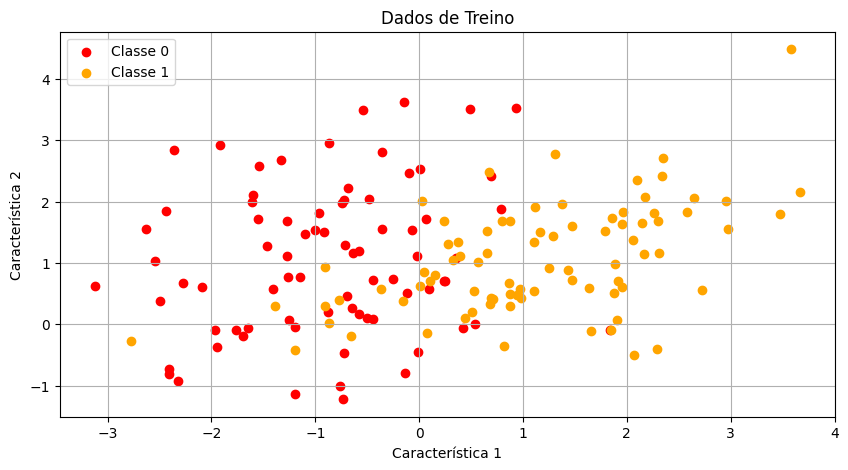

In [5]:
# Passo 4: Visualizando os dados de treino
plt.figure(figsize=(10, 5))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='Classe 1')
plt.title('Dados de Treino')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()

### Criando e "Treinando" o Modelo KNN

Com nossos dados de treino preparados, o próximo passo é criar o nosso modelo classificador e alimentá-lo com esses dados. Esse processo é comumente chamado de "treino".


In [6]:
# Passo 5: Treinando o modelo KNN com o conjunto de treino
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
# Passo 6: Escolhendo um ponto de teste aleatório
random_index = np.random.randint(0, len(X_test))
test_point = X_test[random_index]
true_class = y_test[random_index]  # Classe verdadeira do ponto de teste

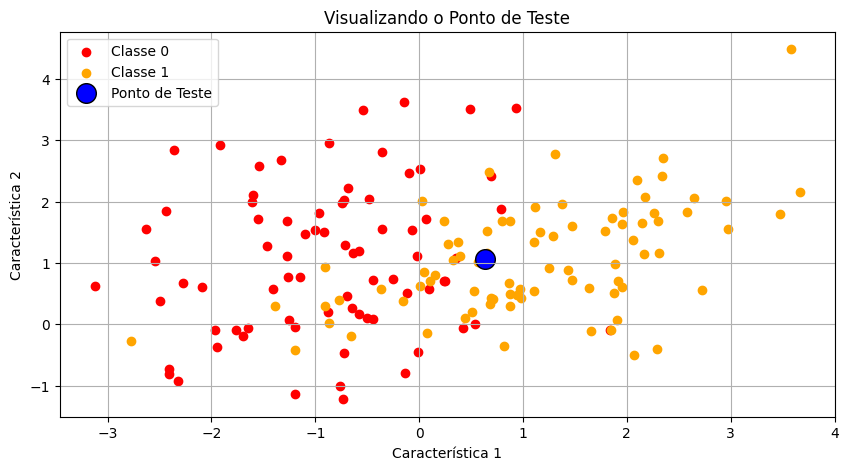

In [8]:
# Passo 7: Visualizando o ponto de teste
plt.figure(figsize=(10, 5))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='Classe 1')
plt.scatter(test_point[0], test_point[1], color='blue', edgecolor='black', marker='o', s=200, label='Ponto de Teste')
plt.title('Visualizando o Ponto de Teste')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()

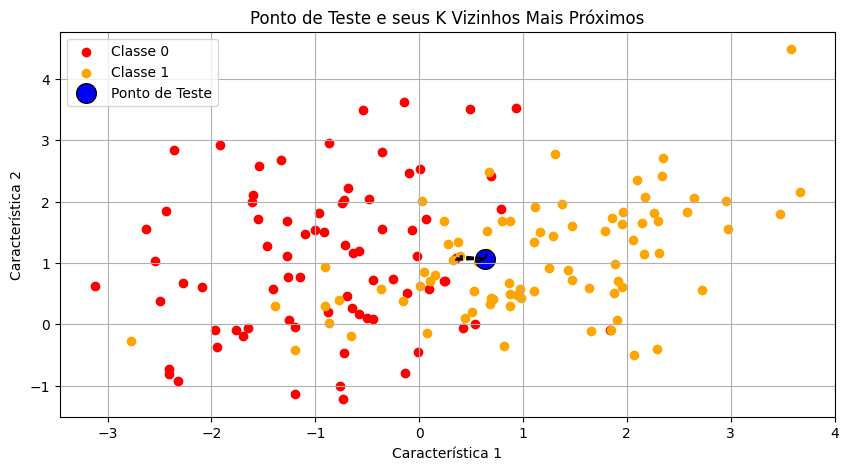

In [9]:
# Passo 8: Encontrando os K vizinhos mais próximos do ponto de teste
neighbors = knn.kneighbors([test_point], return_distance=False)

plt.figure(figsize=(10, 5))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='Classe 1')
plt.scatter(test_point[0], test_point[1], color='blue', edgecolor='black', marker='o', s=200, label='Ponto de Teste')
for neighbor in neighbors[0]:
    plt.plot([test_point[0], X_train[neighbor][0]], [test_point[1], X_train[neighbor][1]], 'k--')
plt.title('Ponto de Teste e seus K Vizinhos Mais Próximos')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()



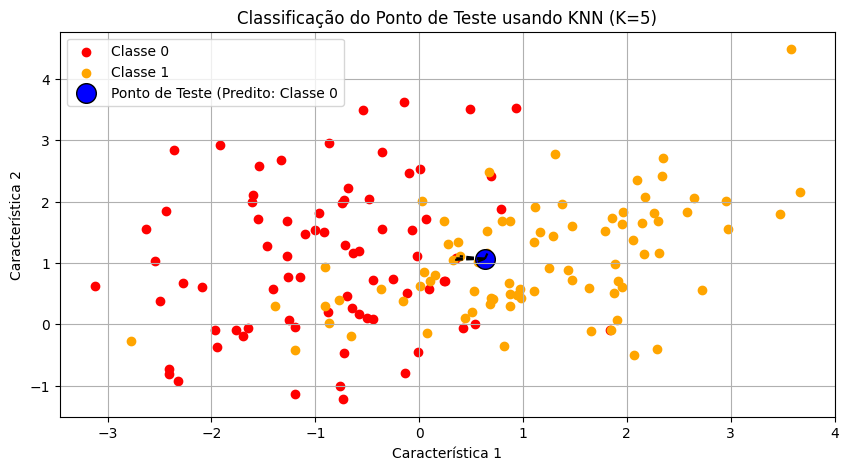

In [10]:
# Passo 9: Classificando o ponto de teste com base nos vizinhos
y_pred_single = knn.predict([test_point])

# Mostrar a classificação final e a classe verdadeira
plt.figure(figsize=(10, 5))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='Classe 1')
plt.scatter(test_point[0], test_point[1], color='blue', edgecolor='black', marker='o', s=200,
            label=f'Ponto de Teste (Predito: {"Classe 0" if y_pred_single[0] == 1 else "Classe 1"}')
for neighbor in neighbors[0]:
    plt.plot([test_point[0], X_train[neighbor][0]], [test_point[1], X_train[neighbor][1]], 'k--')
plt.title(f'Classificação do Ponto de Teste usando KNN (K={k})')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()



### Encontrando o 'k' Ideal com o Método do Cotovelo

Até agora, usamos um valor de `k` (`k=5`) que escolhemos com base na intuição. Mas como saber se esse é o melhor valor para o nosso problema? O ideal é usar uma abordagem mais metódida.

O **Método do Cotovelo** (*Elbow Method*) é uma técnica que nos ajuda a encontrar um bom valor para `k`. A ideia é simples: nós vamos treinar e avaliar o modelo KNN com vários valores de `k` diferentes e ver qual deles nos dá a menor taxa de erro.


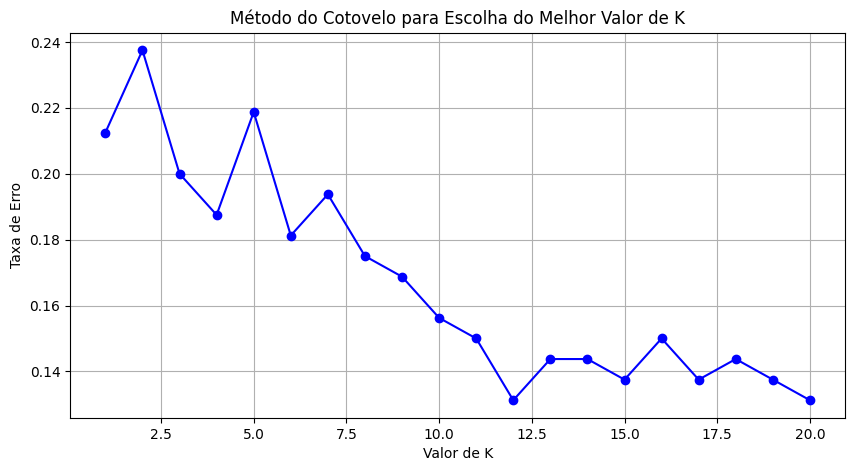

In [11]:
# Passo 10: Usando o Método do Cotovelo para determinar o melhor valor de 'k'
error_rates = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    error_rates.append(1 - scores.mean())

# Plotando o gráfico do Método do Cotovelo
plt.figure(figsize=(10, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='blue')
plt.title('Método do Cotovelo para Escolha do Melhor Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Taxa de Erro')
plt.grid(True)
plt.show()



In [12]:
# Passo 11: Escolhendo o melhor valor de 'k' baseado no Método do Cotovelo
best_k = k_values[np.argmin(error_rates)]
print(f"O melhor valor de 'k' baseado no Método do Cotovelo é: {best_k}")



O melhor valor de 'k' baseado no Método do Cotovelo é: 12


In [13]:
# Passo 12: Re-treinando o modelo com o melhor valor de 'k'
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Avaliação do modelo atualizado no conjunto de teste
accuracy = knn_best.score(X_test, y_test)
print(f"Acurácia do modelo KNN com k={best_k} no conjunto de teste: {accuracy:.2f}")



Acurácia do modelo KNN com k=12 no conjunto de teste: 0.85


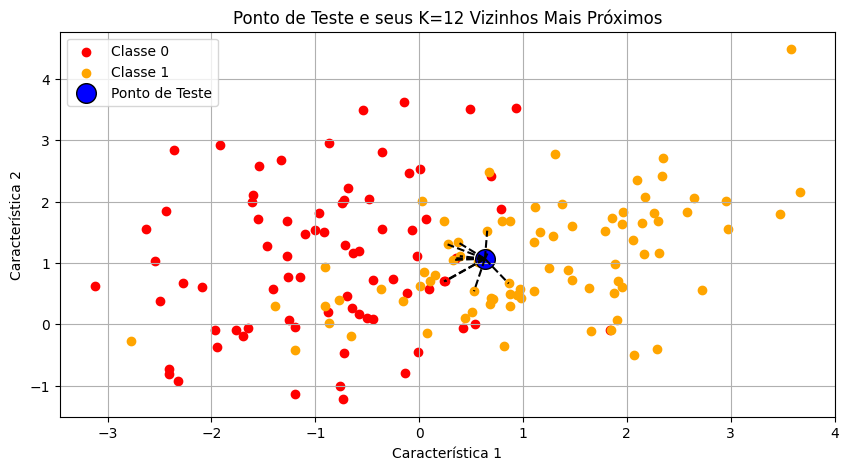

In [14]:
# Passo 13: Visualizando novamente o ponto de teste com o melhor valor de 'k'
neighbors_best = knn_best.kneighbors([test_point], return_distance=False)

plt.figure(figsize=(10, 5))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='Classe 1')
plt.scatter(test_point[0], test_point[1], color='blue', edgecolor='black', marker='o', s=200, label='Ponto de Teste')
for neighbor in neighbors_best[0]:
    plt.plot([test_point[0], X_train[neighbor][0]], [test_point[1], X_train[neighbor][1]], 'k--')
plt.title(f'Ponto de Teste e seus K={best_k} Vizinhos Mais Próximos')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()



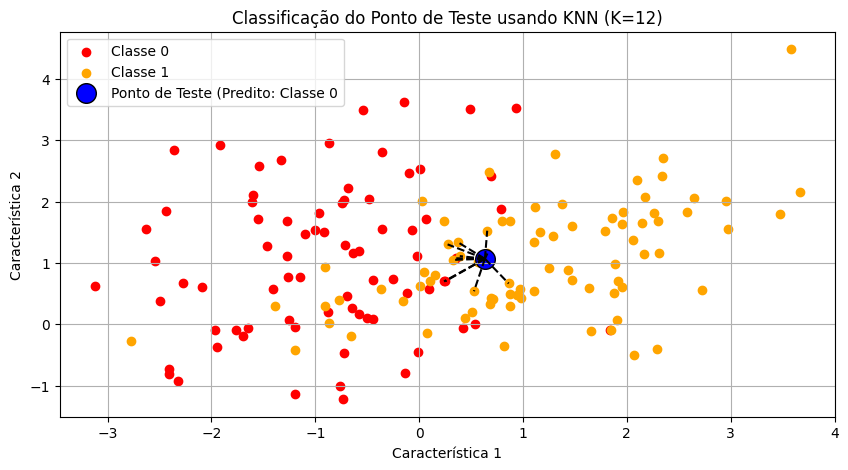

In [15]:
# Passo 14: Classificando o ponto de teste com o melhor valor de 'k'
y_pred_single_best = knn_best.predict([test_point])

# Mostrar a classificação final e a classe verdadeira com o melhor valor de 'k'
plt.figure(figsize=(10, 5))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='Classe 1')
plt.scatter(test_point[0], test_point[1], color='blue', edgecolor='black', marker='o', s=200,
            label=f'Ponto de Teste (Predito: {"Classe 0" if y_pred_single_best[0] == 1 else "Classe 1"}')
for neighbor in neighbors_best[0]:
    plt.plot([test_point[0], X_train[neighbor][0]], [test_point[1], X_train[neighbor][1]], 'k--')
plt.title(f'Classificação do Ponto de Teste usando KNN (K={best_k})')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()


# Exercicio K-NN: Classificando Flores de Íris com KNN

## **Objetivo:**
O objetivo deste exercício é construir um classificador KNN para prever a espécie de uma flor de Íris com base nas suas características (comprimento e largura da sépala e da pétala). Utilizaremos o famoso dataset "Iris", que já vem incluído na biblioteca scikit-learn.

## **Contexto do Dataset:**
O dataset Iris contém 150 amostras de 3 espécies diferentes de flores de Íris (Setosa, Versicolour e Virginica). Para cada amostra, temos 4 características medidas em centímetros:

    Comprimento da Sépala (Sepal Length)

    Largura da Sépala (Sepal Width)

    Comprimento da Pétala (Petal Length)

    Largura da Pétala (Petal Width)

Mãos à obra!



In [ ]:
# Importações necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Carregar o dataset
iris = load_iris()
X = iris.data
y = iris.target

# Dividir os Dados em Treino e Teste

Agora, divida os dados escalonados em conjuntos de treino e teste. Utilize 70% dos dados para treino e 30% para teste.

Tarefa:

    Use a função train_test_split.

    Lembre-se de usar o random_state para garantir que seus resultados sejam reprodutíveis.

## Encontrar o Melhor 'k' com o Método do Cotovelo

Assim como na aula, utilize um loop e a validação cruzada (cross_val_score) para testar diferentes valores de k (por exemplo, de 1 a 25) e encontrar o que resulta na menor taxa de erro.

Tarefa:

    Crie um loop para testar valores de k.

    Armazene as taxas de erro em uma lista.

    Plote o gráfico da "Taxa de Erro vs. Valor de K" para visualizar o "cotovelo".

## Treinar e Avaliar o Modelo Final

Após identificar o melhor valor de k no gráfico anterior, treine o modelo KNN final com esse valor e avalie seu desempenho no conjunto de teste.

Tarefa:

    Escolha o valor de k que parece ser o "cotovelo" no seu gráfico.

    Crie uma nova instância do KNeighborsClassifier com este k.

    Treine o modelo com X_train e y_train.

    Faça as previsões para o X_test.

    Calcule e imprima a acurácia do modelo.